# Exercise 3: Extracting image features

## 1. Install dependencies, if needed

Run the commands below to install the dependencies

In [1]:
!pip install -q pillow matplotlib scikit-image scikit-learn gdown

## 2. Read image and crop region

- Download the image by running the next cell

In [2]:
import zipfile
import gdown
import os

if not os.path.exists("image_week3"):
    id = "1UbOP9u0EfNBhcLA_9rJ7gDoxBQTZzGjX"
    gdown.download(id=id, output="image_week3.zip", quiet=True)
    with zipfile.ZipFile("image_week3.zip", 'r') as zip_ref:
        zip_ref.extractall()
    
print(os.listdir("image_week3"))

['normalized_image.tif', 'features.npy']


- Alternatively, download the image from [here](https://drive.google.com/file/d/1UbOP9u0EfNBhcLA_9rJ7gDoxBQTZzGjX/view?usp=sharing). 

- The zip file contains one normalized image with 3 bands (near infrared, red and green). Read the image using the function ***imread*** of the ***skimage*** library, and visualize it using ***matplotlib***
- Use the provided bounding boxes to crop a region that contains a building
- Visualize the patch

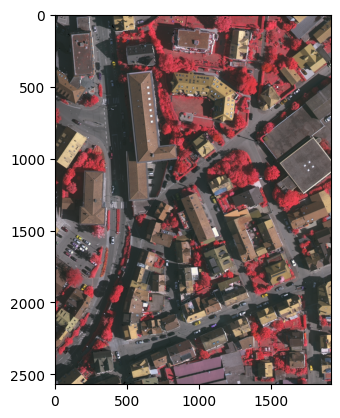

In [3]:
import numpy as np
from skimage.io import imsave, imread
import matplotlib.pyplot as plt

# TODO: Read image
norm_image = imread("image_week3/normalized_image.tif")
# TODO: Visualize the image using matplotlib
plt.imshow(norm_image)
plt.show()

In [4]:
y_min = 210
x_min = 494
y_max = 351
x_max = 697
# TODO; Crop the image using the bounding box coordinates defined above
crop_arr = norm_image[y_min:y_max+1, x_min:x_max+1]

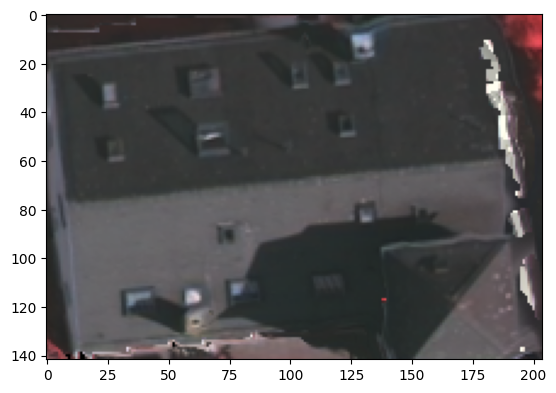

In [5]:
# TODO: Display the cropped region 
plt.imshow(crop_arr)
plt.show()

## 3. Implement functions to compute image features 

- Implement 3 functions to compute image features:
    - Compute the average value for each of the three bands
    - Compute the standard deviation for each of the three bands
    - Compute the histogram for each of the three bands


### Computing the average feature

In [6]:
def convert_data_to_shape_pixels_by_bands(data):
    """
    If needed it converts data to a matrix with shape: num_pixels x num_features
    If data is already a 2D numpy array it returns the same array
    Parameters
    ==================
    data: 2D or 3D numpy array
    
    Returns
    ==================
    output: 2D numpy array with shape: num_pixels x num_features
    """
    num_dimensions = len(data.shape)
    assert(num_dimensions == 2 or num_dimensions == 3)
    if num_dimensions == 3:
        num_bands = data.shape[-1]
        return data.reshape((-1, num_bands))
    else:
        return data


def compute_average_feature_with_loop(data):
    # Convert data to the shape (num_pixels x num_bands)
    data_2d = convert_data_to_shape_pixels_by_bands(data)
    # TODO: Get the number of bands
    num_bands = data_2d.shape[-1]
    avg_features = np.zeros(num_bands)
    for b in range(num_bands):
        # TODO: compute the average value of each band (use the function np.mean)
        avg_features[b] = np.mean(data_2d[:, b])
    return avg_features

# same function but without a for loop
def compute_average_feature(data):
    # Convert data to the shape (num_pixels x num_bands)
    data_2d = convert_data_to_shape_pixels_by_bands(data)
    # TODO: compute the average value of each band using np.mean() directly
    avg_features = np.mean(data_2d, axis=0)
    return avg_features

In [7]:
# TODO: Compute and print the average feature of the cropped region using both functions
#       Check that the results are the same
avg_features_crop_with_loop = compute_average_feature_with_loop(crop_arr)
print(avg_features_crop_with_loop)
avg_features_crop = compute_average_feature(crop_arr)
print(avg_features_crop)
assert np.all(avg_features_crop_with_loop == avg_features_crop)

[69.97932201 68.94780447 70.07636012]
[69.97932201 68.94780447 70.07636012]


### Compute the standard deviation feature

In [8]:
def compute_standard_deviation_feature(data):
    # If needed convert data to the shape (num_pixels x num_bands)
    data_2d = convert_data_to_shape_pixels_by_bands(data)
    # TODO: Compute the standard deviation feature (using the numpy function np.std)
    return np.std(data_2d, axis=0)

In [9]:
# TODO: Compute and print the standard deviation feature of the cropped region
std_features_crop = compute_standard_deviation_feature(crop_arr)
print(std_features_crop)

[30.38382639 27.19202347 28.17628373]


### Compute the histogram feature

In [10]:
def compute_histogram_feature(data, num_bins=10):
    # If needed convert data to the shape (num_pixels x num_bands)
    data_2d = convert_data_to_shape_pixels_by_bands(data)
    num_bands = data_2d.shape[1]
    hist_features = np.zeros((num_bands, num_bins)).astype(np.float32)
    for b in range(num_bands):
        # TODO: compute the histogram for each band 
        #       use the function np.histogram(array, bins=num_bins)
        hist, _ = np.histogram(data_2d[:, b], bins=num_bins)
        hist_features[b, :] = hist
    # Return a 1D array containing all the values
    return hist_features.flatten()

In [11]:
# TODO: Compute and print the histogram feature of the cropped region
hist_features_crop = compute_histogram_feature(crop_arr)
print(hist_features_crop)

[1.0000e+01 6.7690e+03 1.2156e+04 5.4910e+03 3.6700e+03 2.7700e+02
 2.4500e+02 1.8400e+02 8.4000e+01 8.2000e+01 1.0000e+01 6.9480e+03
 1.2512e+04 6.6910e+03 2.1840e+03 1.9000e+02 1.6500e+02 1.3900e+02
 5.8000e+01 7.1000e+01 1.0000e+01 6.5600e+03 1.2244e+04 4.6860e+03
 4.7260e+03 2.6100e+02 1.6000e+02 1.8500e+02 6.5000e+01 7.1000e+01]


## 4. Segment the image into regions using SLIC

Use the function ***slic*** from the ***skimage*** library to segment the image into regions. You can find more information about how to use this function in the [skimage documentation](https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.slic).

In [12]:
# TODO: Segment the image into regions using SLIC
from skimage.segmentation import slic
segmented_image = slic(norm_image, n_segments=700, start_label=0)

# Compute the real number of regions 
num_regions = len(np.unique(segmented_image))
print(num_regions)

491


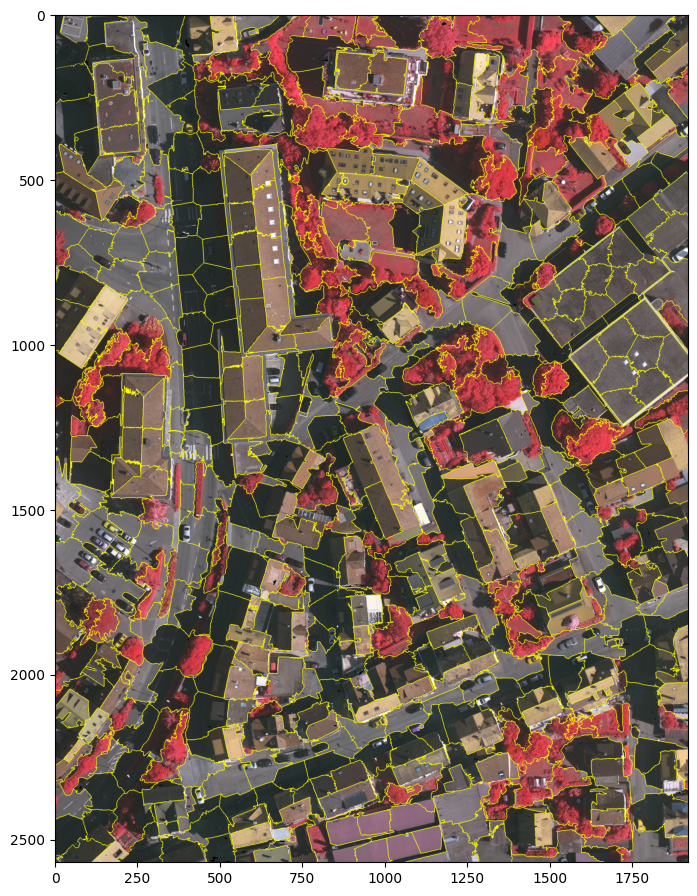

In [13]:
from skimage.segmentation import mark_boundaries
# Plot borders of regions obtained by SLIC
plt.figure(figsize = (11,11)) 
plt.imshow(mark_boundaries(norm_image, segmented_image))
plt.show()

## 5. Compute image features from regions

- Implement the function (below) to compute image feature from regions obtained by SLIC
- Compute the features for all the regions of the example image
- Save compute features on disk using the function **np.save**

Tip: if you encounter **IndexError**, set the **start_label** parameter properly when calling **slic** in section 4.

In [14]:
def compute_image_features_from_regions(image, segmentation_map):
    num_regions = len(np.unique(segmentation_map))
    all_features = []
    for id_region in range(num_regions):
        # Obtain pixel values of each regions, with shape (num_pixels x num_bands)
        pixel_values = image[segmentation_map==id_region]
        # TODO: compute the average, standard deviation and histogram features
        #       and concatenated them using the function (np.concatenate)
        avg = compute_average_feature(pixel_values)
        std = compute_standard_deviation_feature(pixel_values)
        hist_features = compute_histogram_feature(pixel_values)
        features = np.concatenate([avg, std, hist_features])
        # Add concatenated features to the variable all_features
        all_features.append(features)
    # convert list to numpy array of shape: (num_regions x feature_vector_length)
    return np.array(all_features).astype(np.float32)

In [15]:
# TODO: Compute features for each region
features_per_region = compute_image_features_from_regions(norm_image, segmented_image)

In [16]:
# TODO: Save features using the function np.save(output_path, array)
np.save("image_week3/features.npy", features_per_region)

## 6. Answer the remaining questions of the PDF instructions file

#### Q1. In the Jupyter Notebook, we ask SLIC to obtain 700 segments. You can increase or decrease this value. What do you think is the disadvantage of using very large values or very small values?

When using a low number of regions we have more chances that each region contains objects of different classes.
When we use a large number of regions the information contained in each region becomes more homogeneous and contain less contextual information.

#### Q2. What is the shape of the numpy array that contains all the image features, computed by compute_image_features_from_regions?

It should be a 2D array of shape (491, 36) -> 491 rows and 36 columns